In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rcParams.update(mpl.rcParamsDefault)
mpl.style.use('seaborn')
mpl.rcParams['font.family'] = 'malgun gothic'
mpl.rcParams['axes.unicode_minus'] = False

In [3]:
test = pd.read_csv('data/aug_test.csv')
test

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,1289,city_103,0.920,Male,No relevent experience,no_enrollment,Graduate,Humanities,16,NaN,Public Sector,4,15
2125,195,city_136,0.897,Male,Has relevent experience,no_enrollment,Masters,STEM,18,NaN,NaN,2,30
2126,31762,city_100,0.887,Male,No relevent experience,no_enrollment,Primary School,NaN,3,NaN,Pvt Ltd,never,18
2127,7873,city_102,0.804,Male,Has relevent experience,Full time course,High School,NaN,7,100-500,Public Sector,1,84


In [4]:
train = pd.read_csv('data/aug_train.csv')
train

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


In [5]:
# train셋 정보
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [6]:
# 각 컬럼 정보
list(train.columns)

['enrollee_id',
 'city',
 'city_development_index',
 'gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job',
 'training_hours',
 'target']

In [7]:
train['last_new_job'].unique()

array(['1', '>4', 'never', '4', '3', '2', nan], dtype=object)

In [8]:
# 컬럼명 번역
col_to_kor = {
    'enrollee_id' : '고유ID',
    'city': '도시코드',
    'city_development_index' : '도시개발지수(scaled)',
    'gender': '성별',
    'relevent_experience': '관련경험',
    'enrolled_university': '대학유형(있는 경우)',
    'education_level': '학력',
    'major_discipline' : '전공',
    'experience': '연단위경력',
    'company_size': '현재직장직원수',
    'company_type' : '현재직장고용주유형',
    'last_new_job': '현재직장직전공백기간(년)',
    'training_hours': '교육이수시간',
    'target': '이직희망여부'
}
train.rename(columns=col_to_kor, inplace=True)

In [79]:
# for col in train.columns:
#     print(train[col].isna().sum())
print(train.shape)
train.isna().sum()

(19158, 14)


고유ID              0
도시코드              0
도시개발지수(scaled)    0
성별                0
관련경험              0
대학유형(있는 경우)       0
학력                0
전공                0
연단위경력             0
현재직장직원수           0
현재직장고용주유형         0
현재직장직전공백기간(년)     0
교육이수시간            0
이직희망여부            0
dtype: int64

In [10]:
str_cols = [] # 모든 숫자형 컬럼
int_cols = [] # 모든 범주형 컬럼
all_data = [] # 모든 범주형 데이터 리스트

for col in train.columns:
    if train[col].dtypes == 'object':
        str_cols.append(col)
        for dat in train[col].unique():
            all_data.append(dat)
    else:
        int_cols.append(col)
            
 # 전체 범주형 컬럼 원핫인코딩시 전체 범주형 컬럼개수
print(all_data, '\n\n전체 컬럼개수', len(all_data))

['city_103', 'city_40', 'city_21', 'city_115', 'city_162', 'city_176', 'city_160', 'city_46', 'city_61', 'city_114', 'city_13', 'city_159', 'city_102', 'city_67', 'city_100', 'city_16', 'city_71', 'city_104', 'city_64', 'city_101', 'city_83', 'city_105', 'city_73', 'city_75', 'city_41', 'city_11', 'city_93', 'city_90', 'city_36', 'city_20', 'city_57', 'city_152', 'city_19', 'city_65', 'city_74', 'city_173', 'city_136', 'city_98', 'city_97', 'city_50', 'city_138', 'city_82', 'city_157', 'city_89', 'city_150', 'city_70', 'city_175', 'city_94', 'city_28', 'city_59', 'city_165', 'city_145', 'city_142', 'city_26', 'city_12', 'city_37', 'city_43', 'city_116', 'city_23', 'city_99', 'city_149', 'city_10', 'city_45', 'city_80', 'city_128', 'city_158', 'city_123', 'city_7', 'city_72', 'city_106', 'city_143', 'city_78', 'city_109', 'city_24', 'city_134', 'city_48', 'city_144', 'city_91', 'city_146', 'city_133', 'city_126', 'city_118', 'city_9', 'city_167', 'city_27', 'city_84', 'city_54', 'city_3

In [11]:
str_cols

['도시코드',
 '성별',
 '관련경험',
 '대학유형(있는 경우)',
 '학력',
 '전공',
 '연단위경력',
 '현재직장직원수',
 '현재직장고용주유형',
 '현재직장직전공백기간(년)']

In [12]:
int_cols

['고유ID', '도시개발지수(scaled)', '교육이수시간', '이직희망여부']

In [13]:
train.describe(include='object')

,도시코드,성별,관련경험,대학유형(있는 경우),학력,전공,연단위경력,현재직장직원수,현재직장고용주유형,현재직장직전공백기간(년)
count,19158,14650,19158,18772,18698,16345,19093,13220,13018,18735
unique,123,3,2,3,5,6,22,8,6,6
top,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1
freq,4355,13221,13792,13817,11598,14492,3286,3083,9817,8040


In [14]:
train.describe()

,고유ID,도시개발지수(scaled),교육이수시간,이직희망여부
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [15]:
train[train['현재직장직원수'].isna()&train['현재직장고용주유형'].isna()]

,고유ID,도시코드,도시개발지수(scaled),성별,관련경험,대학유형(있는 경우),학력,전공,연단위경력,현재직장직원수,현재직장고용주유형,현재직장직전공백기간(년),교육이수시간,이직희망여부
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
5,21651,city_176,0.764,NaN,Has relevent experience,Part time course,Graduate,STEM,11,NaN,NaN,1,24,1.0
10,29452,city_21,0.624,NaN,No relevent experience,Full time course,High School,NaN,2,NaN,NaN,never,32,1.0
13,5826,city_21,0.624,Male,No relevent experience,NaN,NaN,NaN,2,NaN,NaN,never,24,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19144,17191,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,4,NaN,NaN,never,48,1.0
19151,11385,city_149,0.689,Male,No relevent experience,Full time course,Graduate,NaN,2,NaN,NaN,1,60,0.0
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0


In [16]:
# 컬럼별 고유값 개수
for col in train.columns:
    print(f'{col}', train[col].unique().shape[0])
    
print('--성별', train['성별'].unique())

고유ID 19158
도시코드 123
도시개발지수(scaled) 93
성별 4
관련경험 2
대학유형(있는 경우) 4
학력 6
전공 7
연단위경력 23
현재직장직원수 9
현재직장고용주유형 7
현재직장직전공백기간(년) 7
교육이수시간 241
이직희망여부 2
--성별 ['Male' nan 'Female' 'Other']


## 숫자형 컬럼

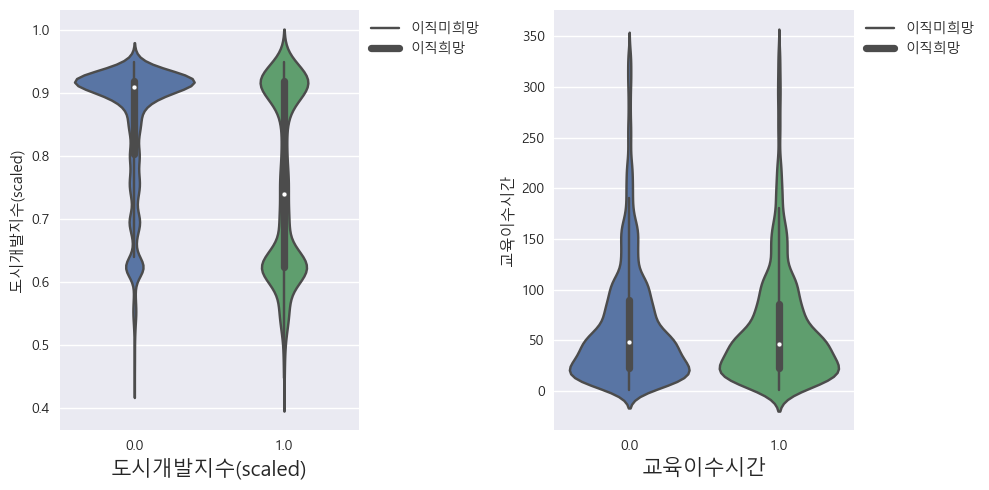

In [17]:
# sns.boxplot(y=col, x='')
int_cols_toplot = int_cols[1:3] # 고유ID, 이직희망여부는 시각화 필요x
fig, axes = plt.subplots(nrows=1, ncols=len(int_cols_toplot), figsize=(10,5))

for idx, i in enumerate(int_cols_toplot):
    sns.violinplot(x='이직희망여부', y=i, data=train, ax=axes[idx])
    axes[idx].set_xlabel(i, fontsize=15)
    axes[idx].legend(['이직미희망', '이직희망'], bbox_to_anchor=(1,1), loc='upper left')
    
plt.tight_layout()
plt.show()    

In [18]:
int_cols_toplot

['도시개발지수(scaled)', '교육이수시간']

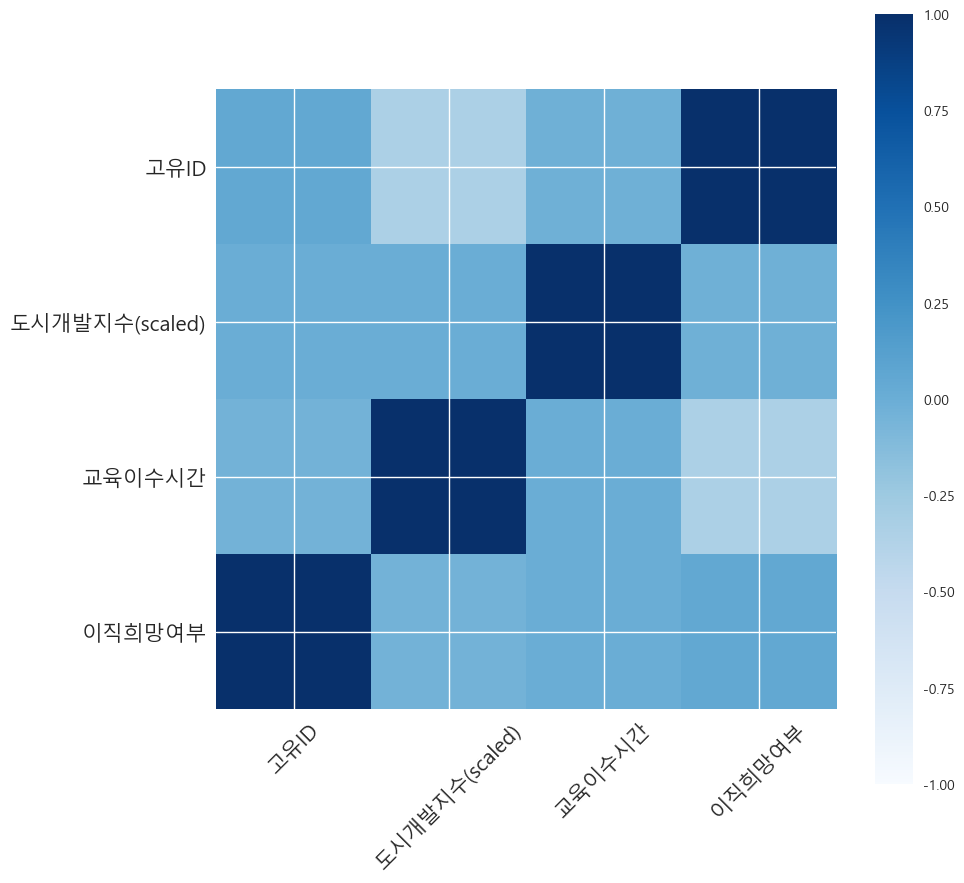

In [19]:
# 숫자형 컬럼간의 상관관계 => 서로의 상관관계는 그닥
to_corr = train[int_cols]
corr = to_corr.corr()
plt.figure(figsize=(10,10))
plt.imshow(corr.loc[corr.columns[::-1]], cmap='Blues', vmin=-1, vmax=1)

plt.xticks(ticks=range(to_corr.columns.size), labels=to_corr.columns,\
           rotation=45, fontsize=15)
plt.yticks(ticks=range(to_corr.columns.size), labels=to_corr.columns, \
          fontsize=15)

plt.colorbar()
plt.show()

# 1st try: 널값에 최빈값 넣고 시각화

In [83]:
def pre_churi(H_P_0=500, H_P_1='mode'):
    how_to_left = ['mode','max','mean','median']
    class InvalidModeError(Exception):
        def __init__(self, invalid_mode):
            self.invalid_mode = invalid_mode
        def __str__(self):
            return f"{self.invalid_mode} - 사용할 수 없는 모드입니다. 'mode','max','mean','median'만 가능합니다."
        
    if type(H_P_0) != int and H_P_1 not in how_to_left:
        raise InvalidModeError(mode)
        
    drop_list
    for col in train.columns:
        if 1 < train[col].isna().sum() <= H_P_0:
            drop_list.append(col)
    train.dropna(subset=drop_list, inplace=True)
    
    for col in train.columns:
        if train[col].isna().sum():
            if H_P_1=='mode':
                train.loc[train[col].isna(), col] = train[col].mode()[0]
            elif H_P_1=='max':
                train.loc[train[col].isna(), col] = train[col].max()[0]
            elif H_P_1=='mean':
                train.loc[train[col].isna(), col] = train[col].mean()[0]
            elif H_P_1=='median':
                train.loc[train[col].isna(), col] = train[col].median()[0]

In [21]:
# 최빈값 제대로 들어갔는지 확인
train.isna().sum()

고유ID              0
도시코드              0
도시개발지수(scaled)    0
성별                0
관련경험              0
대학유형(있는 경우)       0
학력                0
전공                0
연단위경력             0
현재직장직원수           0
현재직장고용주유형         0
현재직장직전공백기간(년)     0
교육이수시간            0
이직희망여부            0
dtype: int64

In [22]:
# 븐류하여 상관성을 시각화 할 범주형 컬럼들
print(len(str_cols),'개')
str_cols

10 개


['도시코드',
 '성별',
 '관련경험',
 '대학유형(있는 경우)',
 '학력',
 '전공',
 '연단위경력',
 '현재직장직원수',
 '현재직장고용주유형',
 '현재직장직전공백기간(년)']

In [33]:
str_cols_toplot = str_cols[1:]
str_cols_toplot
# train['도시코드'].value_counts()
# train.columns

['성별',
 '관련경험',
 '대학유형(있는 경우)',
 '학력',
 '전공',
 '연단위경력',
 '현재직장직원수',
 '현재직장고용주유형',
 '현재직장직전공백기간(년)']

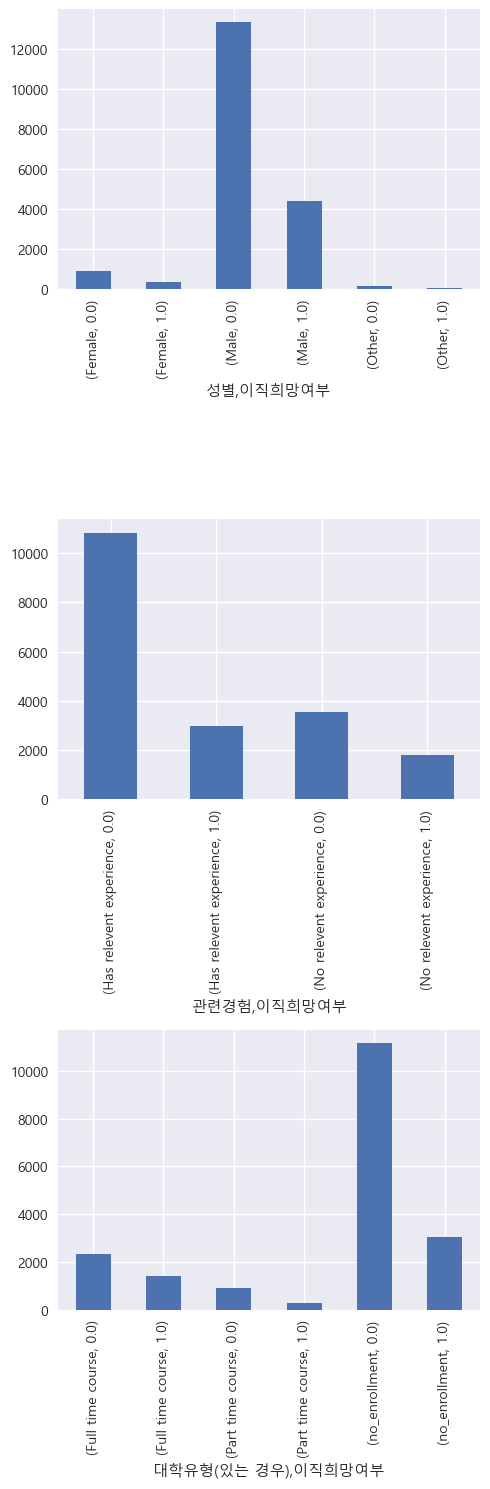

In [74]:
n = 1 # 몇 열로 나누어 그릴건지
str_cols_0 = str_cols[1:4]
fig, axes = plt.subplots(nrows=len(str_cols_0)//n, ncols=n, figsize=(5,15))

for idx, i in enumerate(str_cols_0):
    train.groupby([i,'이직희망여부'])['이직희망여부'].count().plot(kind='bar',ax=axes[idx])
    
plt.tight_layout()
plt.show()

In [60]:
for idx, i in enumerate(str_cols_0):
    print(idx)
#     sns.countplot(x=i, data=train, ax=axes[idx//n,idx%n])
#     axes[idx//n,idx%n].barh(train[i].value_counts().index,
#                              train[i].value_counts().values)
#     axes[idx//n,idx%n].set_ylabel(i+'별 인원수', fontsize=10)
#     axes[idx//n,idx%n].legend(['이직미희망', '이직희망'], bbox_to_anchor=(1,1), loc='upper left')
    axes[idx].barh(train[i].value_counts().index,
                             train[i].value_counts().values)
    axes[idx].set_xlabel(i+'별 인원수', fontsize=10)
#     axes[idx%n].set_xticklabels(train[i].value_counts().index,rotation=90)
    axes[idx].legend(['이직미희망', '이직희망'], bbox_to_anchor=(1,1), loc='upper left')

plt.tight_layout()
plt.show()

0
1
2


<Figure size 800x550 with 0 Axes>

In [281]:
train['성별'].value_counts().values

array([17729,  1238,   191], dtype=int64)